# The steps we will foloow in this exercise are as follows:

1. Reading, understanding and visualising the data
2. Preparing the data for modelling (train-test-split, rescaling etc.)
3. Training the model
4. Residual Analysis
5. Predictions and evaluation on the test data set

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Step 1: Reading and Understanding the data

In [2]:
#read the data
housing = pd.read_csv('Housing.csv')
housing.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [3]:
housing.shape

(545, 13)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
housing.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

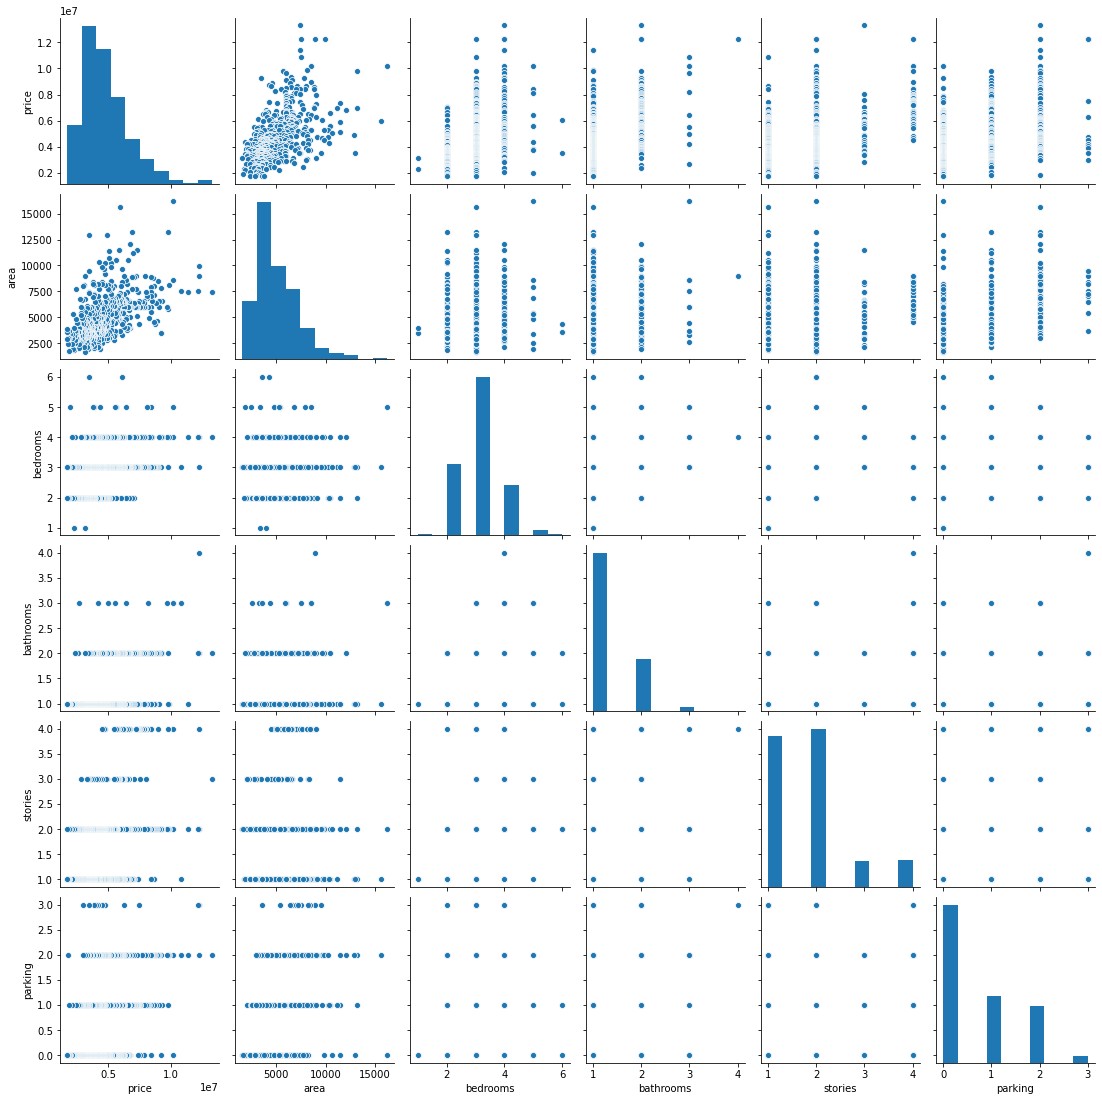

In [6]:
# visualising the numerical variables
# sns.pairplot(housing, x_vars='price',y_vars=[['area','bathroom']], size = 0.7, aspect=0.5)
sns.pairplot(housing)
plt.show()

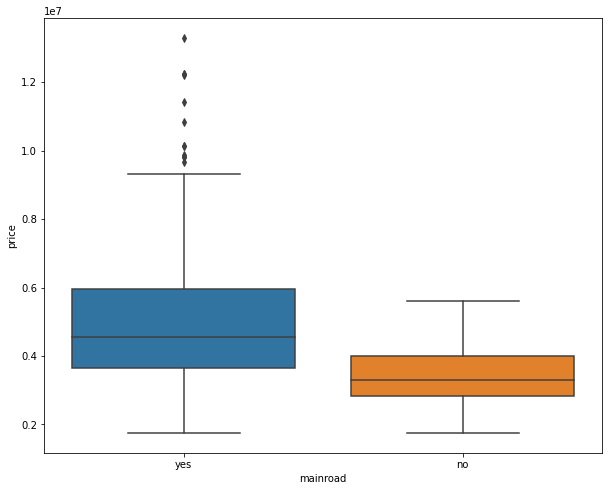

In [7]:
#visualise catrgorial variable
plt.figure(figsize=(10,8))
sns.boxplot(x='mainroad',y='price',data=housing)
plt.show()

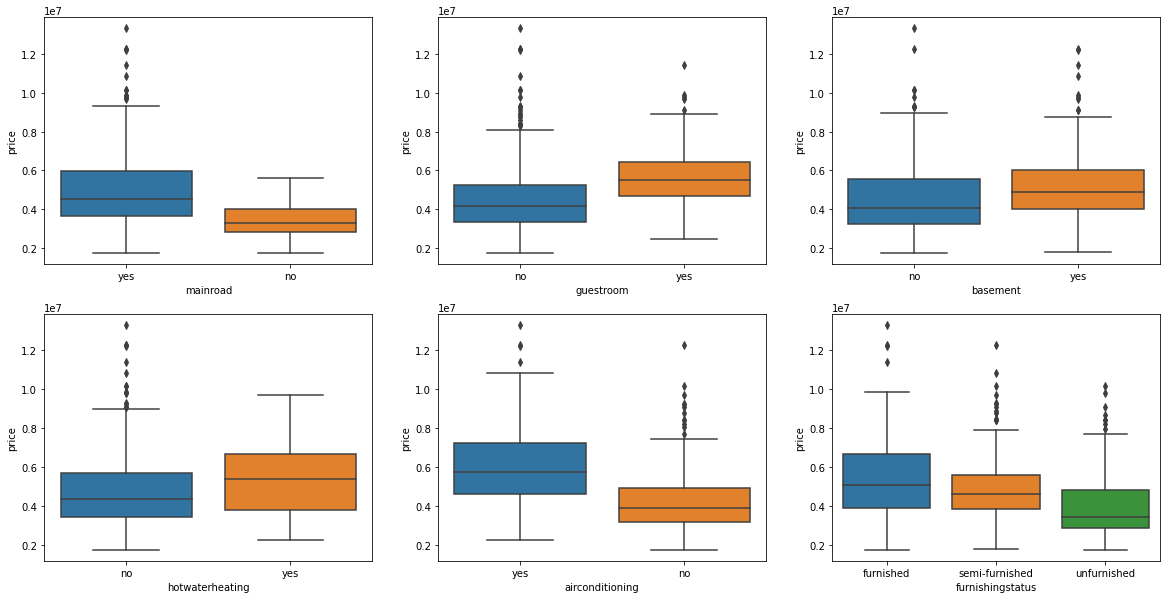

In [8]:
#visualise the catrgorial variables
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.boxplot(x='mainroad',y='price',data=housing)

plt.subplot(2,3,2)
sns.boxplot(x='guestroom',y='price',data=housing)

plt.subplot(2,3,3)
sns.boxplot(x='basement',y='price',data=housing)

plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating',y='price',data=housing)

plt.subplot(2,3,5)
sns.boxplot(x='airconditioning',y='price',data=housing)

plt.subplot(2,3,6)
sns.boxplot(x='furnishingstatus',y='price',data=housing)
plt.show()

# Step 2. Preparing the Data for Modeling

In [9]:
# Conver binray vars to 1/0 and other categorial vars to dummy vars
varlist=['mainroad','guestroom','basement','airconditioning','hotwaterheating']
housing[varlist]

mainroad guestroom basement airconditioning hotwaterheating
0        yes        no       no             yes              no
1        yes        no       no             yes              no
2        yes        no      yes              no              no
3        yes        no      yes             yes              no
4        yes       yes      yes             yes              no
..       ...       ...      ...             ...             ...
540      yes        no      yes              no              no
541       no        no       no              no              no
542      yes        no       no              no              no
543       no        no       no              no              no
544      yes        no       no              no              no

[545 rows x 5 columns]

In [10]:
# housing[varlist].apply(lambda x: x.map())
housing[varlist] = housing[varlist].apply(lambda x : x.map({'yes':1,'no':0}))
housing[varlist].head()

mainroad  guestroom  basement  airconditioning  hotwaterheating
0         1          0         0                1                0
1         1          0         0                1                0
2         1          0         1                0                0
3         1          0         1                1                0
4         1          1         1                1                0

# Dummy Variables

In [11]:
# creating dummy variables for farnishing status
status = pd.get_dummies(housing['furnishingstatus'], drop_first=True)
status.head()

semi-furnished  unfurnished
0               0            0
1               0            0
2               1            0
3               0            0
4               0            0

In [12]:
housing = pd.concat([housing,status], axis=1)
housing.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking prefarea  \
0         0                0                1        2      yes   
1         0                0                1        3       no   
2         1                0                0        2      yes   
3         1                0                1        3      yes   
4         1                0                1        2       no   

  furnishingstatus  semi-furnished  unfurnished  
0        furnished               0            0  
1        furnished               0            0  
2   semi-furnished               1            0  
3        furnished               0            0  
4        furnished               0            0

In [13]:
housing.drop('furnishingstatus', axis=1)

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking prefarea  \
0           0                0                1        2      yes   
1           0                0                1        3       no   
2           1                0                0        2      yes   
3           1                0                1        3      yes   
4           1                0                1        2       no   
..        ...              ...              ...      ...      ...   
540         1                0                0        2       no   
541         0                0                0        0       no   
542         0                0                0        0       no   
543         0                0                0        0       no   
544         0                0                0        0       no   

     semi-furnished  unfurnished  
0                 0            0  
1                 0            0  
2                 1            0  
3                 0            0  
4                 0            0  
..              ...          ...  
540               0            1  
541               1            0  
542               0            1  
543               0            0  
544               0            1  

[545 rows x 14 columns]

# Spiltting data into train and test

In [14]:
df_train, df_test =train_test_split(housing, train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(381, 15)
(164, 15)


# Rescaling the features

1. Min-Max scaling (normalisation): Between 0 an 1
2. Standardisation (mean-0, sigma=1)

In [15]:
# x
# normalisation: (x - xmin)/(xmax - xmin)
# standradisation: (x - mu)/sigma

In [16]:
# 1. Instantiate an object
scaler = MinMaxScaler();

# creat a list of numeric variables
num_vars = ['area','bedrooms','bathrooms','stories','parking','price']

# 2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
359  0.169697  0.155227       0.4        0.0  0.000000         1          0   
19   0.615152  0.403379       0.4        0.5  0.333333         1          0   
159  0.321212  0.115628       0.4        0.5  0.000000         1          1   
35   0.548133  0.454417       0.4        0.5  1.000000         1          0   
28   0.575758  0.538015       0.8        0.5  0.333333         1          0   

     basement  hotwaterheating  airconditioning   parking prefarea  \
359         0                0                0  0.333333       no   
19          0                0                1  0.333333      yes   
159         1                0                1  0.000000       no   
35          0                0                1  0.666667       no   
28          1                1                0  0.666667       no   

    furnishingstatus  semi-furnished  unfurnished  
359      unfurnished               0            1  
19    semi-furnished               1            0  
159        furnished               0            0  
35         furnished               0            0  
28       unfurnished               0            1

In [17]:
# fit(): Calculate xmax, xmin
# transform(): x-xmin/xmax-xmin
# fit_transform(): doing above two works

In [18]:
df_train.describe()

price        area    bedrooms   bathrooms     stories    mainroad  \
count  381.000000  381.000000  381.000000  381.000000  381.000000  381.000000   
mean     0.260333    0.288710    0.386352    0.136483    0.268591    0.855643   
std      0.157607    0.181420    0.147336    0.237325    0.295001    0.351913   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.151515    0.155227    0.200000    0.000000    0.000000    1.000000   
50%      0.221212    0.234424    0.400000    0.000000    0.333333    1.000000   
75%      0.345455    0.398099    0.400000    0.500000    0.333333    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        guestroom    basement  hotwaterheating  airconditioning     parking  \
count  381.000000  381.000000       381.000000       381.000000  381.000000   
mean     0.170604    0.351706         0.052493         0.299213    0.242345   
std      0.376657    0.478131         0.223313         0.458515    0.285933   
min      0.000000    0.000000         0.000000         0.000000    0.000000   
25%      0.000000    0.000000         0.000000         0.000000    0.000000   
50%      0.000000    0.000000         0.000000         0.000000    0.000000   
75%      0.000000    1.000000         0.000000         1.000000    0.333333   
max      1.000000    1.000000         1.000000         1.000000    1.000000   

       semi-furnished  unfurnished  
count      381.000000   381.000000  
mean         0.414698     0.325459  
std          0.493318     0.469162  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          0.000000     0.000000  
75%          1.000000     1.000000  
max          1.000000     1.000000

# Step 3: Training the Model

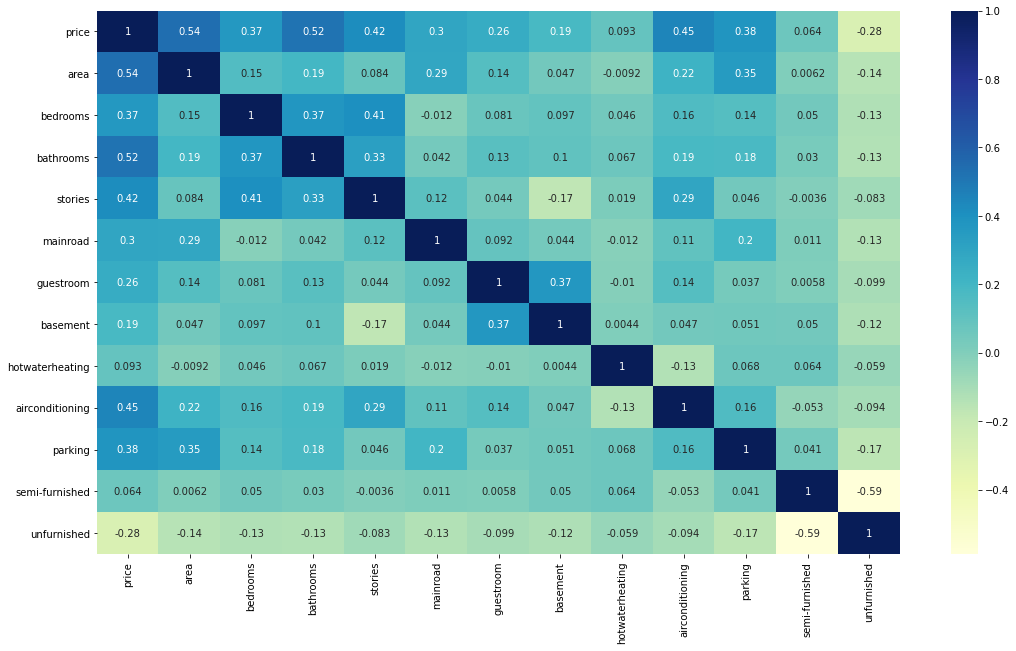

In [19]:
plt.figure(figsize=(18,10))
sns.heatmap(housing.corr(),cmap='YlGnBu', annot=True)
plt.show();

In [20]:
df_train.head()

price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
359  0.169697  0.155227       0.4        0.0  0.000000         1          0   
19   0.615152  0.403379       0.4        0.5  0.333333         1          0   
159  0.321212  0.115628       0.4        0.5  0.000000         1          1   
35   0.548133  0.454417       0.4        0.5  1.000000         1          0   
28   0.575758  0.538015       0.8        0.5  0.333333         1          0   

     basement  hotwaterheating  airconditioning   parking prefarea  \
359         0                0                0  0.333333       no   
19          0                0                1  0.333333      yes   
159         1                0                1  0.000000       no   
35          0                0                1  0.666667       no   
28          1                1                0  0.666667       no   

    furnishingstatus  semi-furnished  unfurnished  
359      unfurnished               0            1  
19    semi-furnished               1            0  
159        furnished               0            0  
35         furnished               0            0  
28       unfurnished               0            1

In [21]:
# X_train, y_train
y_train = df_train.pop('price')
X_train = df_train

In [22]:
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

In [23]:
X_train.head()

area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
359  0.155227       0.4        0.0  0.000000         1          0         0   
19   0.403379       0.4        0.5  0.333333         1          0         0   
159  0.115628       0.4        0.5  0.000000         1          1         1   
35   0.454417       0.4        0.5  1.000000         1          0         0   
28   0.538015       0.8        0.5  0.333333         1          0         1   

     hotwaterheating  airconditioning   parking prefarea furnishingstatus  \
359                0                0  0.333333       no      unfurnished   
19                 0                1  0.333333      yes   semi-furnished   
159                0                1  0.000000       no        furnished   
35                 0                1  0.666667       no        furnished   
28                 1                0  0.666667       no      unfurnished   

     semi-furnished  unfurnished  
359               0            1  
19                1            0  
159               0            0  
35                0            0  
28                0            1

In [24]:
# - statistical significance of the variable 
# - VIF

In [25]:
# add a constant
X_train_sm = sm.add_constant(X_train['area'])

# create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.126894
area     0.462192
dtype: float64

In [26]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           3.15e-29
Time:                        12:56:06   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# add another variable bathroom
X_train_sm = X_train[['area','bathrooms']]
X_train_sm = sm.add_constant(X_train_sm)


# create second model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [28]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           2.51e-54
Time:                        12:56:06   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# add another variable bedrooms
X_train_sm = X_train[['area','bathrooms','bedrooms']]
X_train_sm = sm.add_constant(X_train_sm)


# create second model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           3.12e-57
Time:                        12:56:06   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Adding all variables in the model

In [30]:
# num_vars = ['area','bedrooms','bathrooms','stories','parking','price']
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'semi-furnished',
       'unfurnished'],
      dtype='object')

In [31]:
np.asarray(y_train).dtype

dtype('float64')

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 359 to 520
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              381 non-null    float64
 1   bedrooms          381 non-null    float64
 2   bathrooms         381 non-null    float64
 3   stories           381 non-null    float64
 4   mainroad          381 non-null    int64  
 5   guestroom         381 non-null    int64  
 6   basement          381 non-null    int64  
 7   hotwaterheating   381 non-null    int64  
 8   airconditioning   381 non-null    int64  
 9   parking           381 non-null    float64
 10  prefarea          381 non-null    object 
 11  furnishingstatus  381 non-null    object 
 12  semi-furnished    381 non-null    uint8  
 13  unfurnished       381 non-null    uint8  
dtypes: float64(5), int64(5), object(2), uint8(2)
memory usage: 39.4+ KB


In [33]:
#Conver objects to numeric columns - Data Cleaning
X_train[['prefarea','furnishingstatus']]

prefarea furnishingstatus
359       no      unfurnished
19       yes   semi-furnished
159       no        furnished
35        no        furnished
28        no      unfurnished
..       ...              ...
526       no      unfurnished
53        no   semi-furnished
350       no   semi-furnished
79        no        furnished
520       no      unfurnished

[381 rows x 2 columns]

In [34]:
X_train['prefarea'] = pd.get_dummies(housing['prefarea'])

X_train['prefarea'].head()

359    1
19     0
159    1
35     1
28     1
Name: prefarea, dtype: uint8

In [35]:
X_train['furnishingstatus'] = pd.get_dummies(housing['furnishingstatus'])

X_train['furnishingstatus'].head()

359    0
19     0
159    1
35     1
28     0
Name: furnishingstatus, dtype: uint8

In [36]:
# validate columns data type 
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 359 to 520
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              381 non-null    float64
 1   bedrooms          381 non-null    float64
 2   bathrooms         381 non-null    float64
 3   stories           381 non-null    float64
 4   mainroad          381 non-null    int64  
 5   guestroom         381 non-null    int64  
 6   basement          381 non-null    int64  
 7   hotwaterheating   381 non-null    int64  
 8   airconditioning   381 non-null    int64  
 9   parking           381 non-null    float64
 10  prefarea          381 non-null    uint8  
 11  furnishingstatus  381 non-null    uint8  
 12  semi-furnished    381 non-null    uint8  
 13  unfurnished       381 non-null    uint8  
dtypes: float64(5), int64(5), uint8(4)
memory usage: 34.2 KB


In [37]:
# build a mdeol with all variables
X_train_sm = sm.add_constant(X_train)

# # create model
lr = sm.OLS(y_train, X_train_sm)

# #fit
lr_model = lr.fit()

# #params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           8.83e-83
Time:                        12:56:06   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0521      0.017      3.107      0.002       0.019       0.085
area                 0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms             0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms            0.1908      0.022      8.679      0.000       0.148       0.234
stories              0.1085      0.019      5.661      0.000       0.071       0.146
mainroad             0.0504      0.014      3.520      0.000       0.022       0.079
guestroom            0.0304      0.014      2.233      0.026       0.004       0.057
basement             0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating      0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning      0.0669      0.011      5.899      0.000       0.045       0.089
parking              0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            -0.0594      0.012     -5.040      0.000      -0.083      -0.036
furnishingstatus     0.0274      0.010      2.778      0.006       0.008       0.047
semi-furnished       0.0283      0.008      3.397      0.001       0.012       0.045
unfurnished         -0.0036      0.008     -0.438      0.661      -0.020       0.013
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                     3.76e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.07e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
# significance (p-level)
# VIF

In [39]:
#create dataframe that will contain names of all feature variables and their respetive VIF
vif = pd.DataFrame()
vif['feature'] = X_train.columns
vif['vif'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values(by='vif', ascending=False)
vif

feature    vif
12    semi-furnished  10.25
13       unfurnished   7.64
11  furnishingstatus   7.29
3            stories   1.48
0               area   1.38
1           bedrooms   1.37
6           basement   1.31
2          bathrooms   1.26
8    airconditioning   1.25
9            parking   1.24
5          guestroom   1.22
4           mainroad   1.18
10          prefarea   1.16
7    hotwaterheating   1.08

In [40]:
# We could have
# - High P, High VIF >> Romove them first
#   - High-low:
#        > High P, Low VIF >> Romove them first
#        > Low P, Hight VIF >> Remove after above one
# - Low P, Low VIF

In [41]:
X = X_train.drop('semi-furnished', axis=1)

In [42]:
# add a constant
X_train_sm = sm.add_constant(X_train)

# create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const               0.052074
area                0.234664
bedrooms            0.046735
bathrooms           0.190823
stories             0.108516
mainroad            0.050441
guestroom           0.030428
basement            0.021595
hotwaterheating     0.084863
airconditioning     0.066881
parking             0.060735
prefarea           -0.059428
furnishingstatus    0.027386
semi-furnished      0.028307
unfurnished        -0.003619
dtype: float64

# Step 4 - Residual Analysis

In [43]:
y_train_pred = lr_model.predict(X_train_sm)

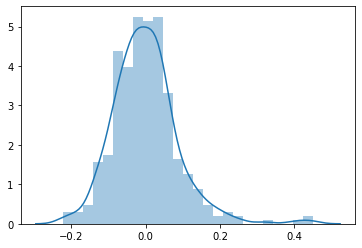

In [44]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

# Step 5 - Predictions and Evaluation on the Test Set

In [45]:
# fit(): Calculate xmax, xmin - train dataset
# transform(): x-xmin/xmax-xmin - test using train derived values
# fit_transform(): doing above two works

In [46]:
# creat a list of numeric variables
num_vars = ['area','bedrooms','bathrooms','stories','parking','price']

# 2. Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
265  0.229697  0.091869       0.4        0.0  0.333333         1          0   
54   0.484848  0.366420       0.4        0.5  0.333333         1          1   
171  0.303030  0.742080       0.4        0.0  0.000000         1          0   
244  0.242424  0.306582       0.4        0.0  0.333333         1          1   
268  0.227879  0.274023       0.6        0.0  0.333333         1          0   

     basement  hotwaterheating  airconditioning   parking prefarea  \
265         0                0                0  0.000000      yes   
54          0                0                1  0.333333       no   
171         0                0                0  0.333333      yes   
244         1                0                0  0.000000      yes   
268         0                0                1  0.000000       no   

    furnishingstatus  semi-furnished  unfurnished  
265   semi-furnished               1            0  
54    semi-furnished               1            0  
171   semi-furnished               1            0  
244   semi-furnished               1            0  
268   semi-furnished               1            0

In [47]:
df_test.describe()

price        area    bedrooms   bathrooms     stories    mainroad  \
count  164.000000  164.000000  164.000000  164.000000  164.000000  164.000000   
mean     0.263176    0.298548    0.408537    0.158537    0.268293    0.865854   
std      0.172077    0.211922    0.147537    0.281081    0.276007    0.341853   
min      0.006061   -0.016367    0.200000    0.000000    0.000000    0.000000   
25%      0.142424    0.148011    0.400000    0.000000    0.000000    1.000000   
50%      0.226061    0.259724    0.400000    0.000000    0.333333    1.000000   
75%      0.346970    0.397439    0.400000    0.500000    0.333333    1.000000   
max      0.909091    1.263992    0.800000    1.500000    1.000000    1.000000   

        guestroom    basement  hotwaterheating  airconditioning     parking  \
count  164.000000  164.000000       164.000000       164.000000  164.000000   
mean     0.195122    0.347561         0.030488         0.353659    0.205285   
std      0.397508    0.477654         0.172452         0.479569    0.289322   
min      0.000000    0.000000         0.000000         0.000000    0.000000   
25%      0.000000    0.000000         0.000000         0.000000    0.000000   
50%      0.000000    0.000000         0.000000         0.000000    0.000000   
75%      0.000000    1.000000         0.000000         1.000000    0.333333   
max      1.000000    1.000000         1.000000         1.000000    1.000000   

       semi-furnished  unfurnished  
count      164.000000   164.000000  
mean         0.420732     0.329268  
std          0.495189     0.471387  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          0.000000     0.000000  
75%          1.000000     1.000000  
max          1.000000     1.000000

In [48]:
y_test = df_test.pop('price')
x_test = df_test

In [53]:
#add a constant
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

const      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
265    1.0  0.091869       0.4        0.0  0.333333         1          0   
54     1.0  0.366420       0.4        0.5  0.333333         1          1   
171    1.0  0.742080       0.4        0.0  0.000000         1          0   
244    1.0  0.306582       0.4        0.0  0.333333         1          1   
268    1.0  0.274023       0.6        0.0  0.333333         1          0   

     basement  hotwaterheating  airconditioning   parking prefarea  \
265         0                0                0  0.000000      yes   
54          0                0                1  0.333333       no   
171         0                0                0  0.333333      yes   
244         1                0                0  0.000000      yes   
268         0                0                1  0.000000       no   

    furnishingstatus  semi-furnished  unfurnished  
265   semi-furnished               1            0  
54    semi-furnished               1            0  
171   semi-furnished               1            0  
244   semi-furnished               1            0  
268   semi-furnished               1            0

In [57]:
# x_test_sm = x_test_sm.drop([])
x_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 265 to 50
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             164 non-null    float64
 1   area              164 non-null    float64
 2   bedrooms          164 non-null    float64
 3   bathrooms         164 non-null    float64
 4   stories           164 non-null    float64
 5   mainroad          164 non-null    int64  
 6   guestroom         164 non-null    int64  
 7   basement          164 non-null    int64  
 8   hotwaterheating   164 non-null    int64  
 9   airconditioning   164 non-null    int64  
 10  parking           164 non-null    float64
 11  prefarea          164 non-null    object 
 12  furnishingstatus  164 non-null    object 
 13  semi-furnished    164 non-null    uint8  
 14  unfurnished       164 non-null    uint8  
dtypes: float64(6), int64(5), object(2), uint8(2)
memory usage: 18.3+ KB


In [60]:
x_test_sm['prefarea'] = pd.get_dummies(housing['prefarea'])

x_test_sm['furnishingstatus'] = pd.get_dummies(housing['furnishingstatus'])


In [61]:
# predict
y_test_pred = lr_model.predict(x_test_sm)

In [64]:
# evaluate
r2_score(y_true = y_test,y_pred=y_test_pred)

0.6729582743459916

We can see that the equation of our btest fitted line is:
    
price = 0.235 ** area + 0.0467 * bedrooms + 0.1908 * bathrooms + 0.01805 * storis + 0.0504 * mainroad + 0.0304 * guestroom + 0.0216 * basement + 0.0849 * hotwaterheating + 0.069 * airconditioning + 0.0607 * parking - 0.0594 * prefarea + 0.0274 * furnishingstatus + 0.0283 * semi-furnished - 0.036 * unfurnished